# Q) A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

## Loding Data Sets

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data = company_data.assign(Sales_Range=pd.cut(company_data['Sales'],bins=[0, 5, 10, 17],labels=['Low','Medium','High']))
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Range
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


### Here, we convert Sales column in categorical column as Low, Medium and High.

In [3]:
company_lable = preprocessing.LabelEncoder()
company_data['Sales_Range'] = company_lable.fit_transform(company_data['Sales_Range'])
company_data['ShelveLoc'] = company_lable.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = company_lable.fit_transform(company_data['Urban'])
company_data['US'] = company_lable.fit_transform(company_data['US'])
company_X = company_data.iloc[:, 1:11]
company_Y = company_data['Sales_Range']
company_x_train,company_x_test,company_y_train,company_y_test = train_test_split(company_X, company_Y, test_size=0.2, random_state=40)

## Building Decision Tree Classifier using Entropy Criteria

In [4]:
company_model = DecisionTreeClassifier(criterion= 'entropy', max_depth=10)
company_model.fit(company_x_train,company_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

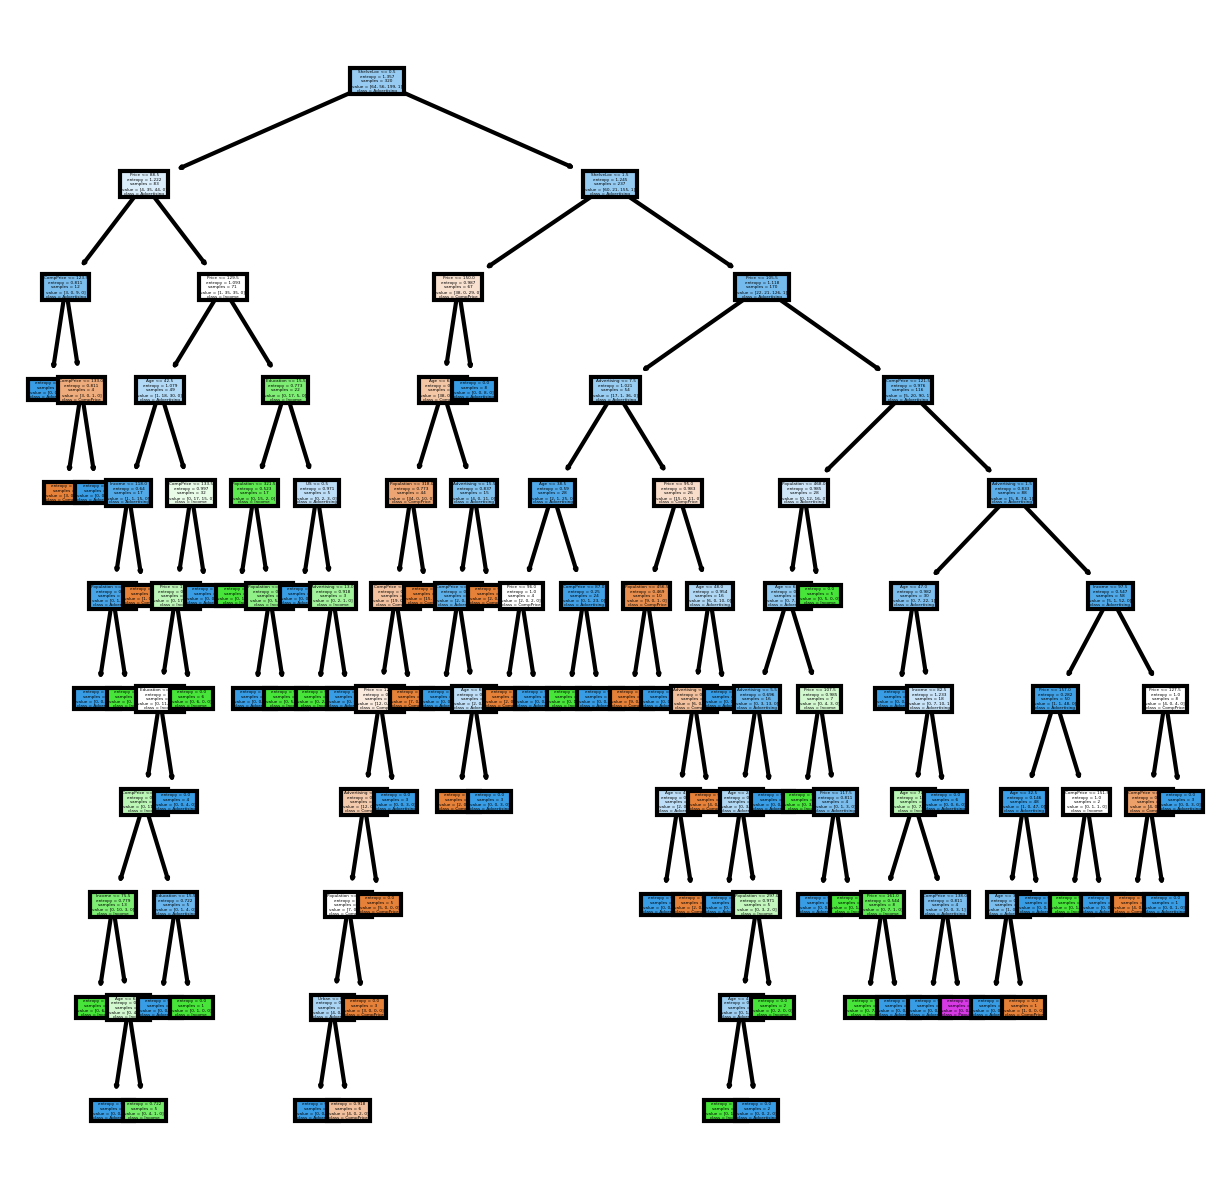

In [5]:
company_fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
company_cn = ['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=300)
tree.plot_tree(company_model, feature_names=company_fn, class_names=company_fn, filled=True);

In [6]:
company_preds = company_model.predict(company_x_test)
pd.Series(company_preds).value_counts()

2    47
0    18
1    15
dtype: int64

In [7]:
pd.crosstab(company_y_test,company_preds)

col_0,0,1,2
Sales_Range,,,
0,8,1,5
1,0,10,10
2,10,4,32


In [8]:
np.mean(company_preds==company_y_test)

0.625

## Building Decision Tree Classifier using Gini Criteria

In [9]:
company_model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)
company_model_gini.fit(company_x_train,company_y_train)
preds_gini = company_model_gini.predict(company_x_test)
np.mean(preds_gini==company_y_test)

0.4875

# Q) Use decision trees to prepare a model on fraud data.

## Loding Data Sets

In [10]:
fraud_check = pd.read_csv('Fraud_check.csv')
fraud_check = fraud_check.assign(Taxable_Income_range=pd.cut(fraud_check['Taxable.Income'],bins=[0, 30000, 100000],labels=['Risky','Good']))
fraud_check = fraud_check.drop(labels='Taxable.Income',axis=1)
fraud_check.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income_range
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [11]:
fraud_check_lable = preprocessing.LabelEncoder()
fraud_check['Undergrad'] = fraud_check_lable.fit_transform(fraud_check['Undergrad'])
fraud_check['Marital.Status'] = fraud_check_lable.fit_transform(fraud_check['Marital.Status'])
fraud_check['Urban'] = fraud_check_lable.fit_transform(fraud_check['Urban'])
fraud_check['Taxable_Income_range'] = fraud_check_lable.fit_transform(fraud_check['Taxable_Income_range'])
fraud_check_X = fraud_check.iloc[:, 0:5]
fraud_check_Y = fraud_check['Taxable_Income_range']
fraud_check_x_train,fraud_check_x_test,fraud_check_y_train,fraud_check_y_test = train_test_split(fraud_check_X, fraud_check_Y, test_size=0.2, random_state=40)

## Building Decision Tree Classifier using Entropy Criteria

In [12]:
fraud_check_model = DecisionTreeClassifier(criterion= 'entropy', max_depth=10)
fraud_check_model.fit(fraud_check_x_train,fraud_check_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

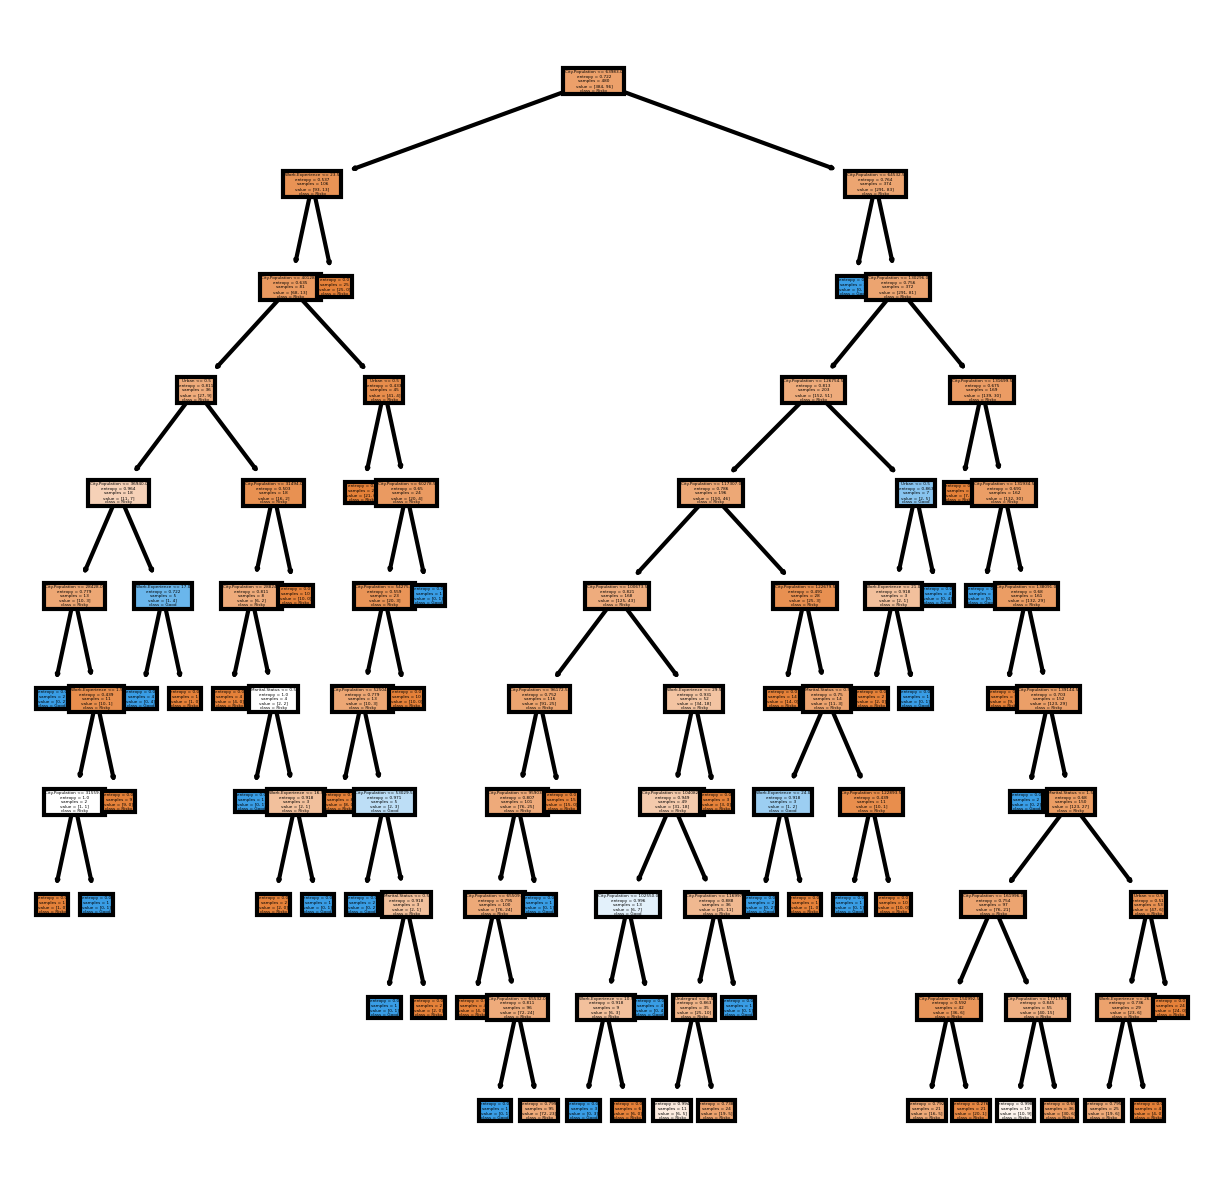

In [13]:
fraud_check_fn = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']
fraud_check_cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=300)
tree.plot_tree(fraud_check_model, feature_names=fraud_check_fn, class_names=fraud_check_cn, filled=True);

In [14]:
fraud_check_preds = fraud_check_model.predict(fraud_check_x_test)
pd.Series(fraud_check_preds).value_counts()

0    111
1      9
dtype: int64

In [15]:
pd.crosstab(fraud_check_y_test,fraud_check_preds)

col_0,0,1
Taxable_Income_range,,
0,85,7
1,26,2


In [16]:
np.mean(fraud_check_preds==fraud_check_y_test)

0.725

## Building Decision Tree Classifier using Gini Criteria

In [17]:
fraud_check_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)
fraud_check_gini.fit(fraud_check_x_train,fraud_check_y_train)
fraud_check_preds_gini = fraud_check_gini.predict(fraud_check_x_test)
np.mean(fraud_check_preds_gini==fraud_check_y_test)

0.7583333333333333

## Building Decision Tree Regression

In [18]:
##fraud_check_regression = DecisionTreeRegressor
##fraud_check_regression.fit(fraud_check_x_train, fraud_check_y_train)